# Term Deposit Sale

## Goal

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

## Attribute information
Input variables:

Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Index

# 1. Import Libraries and load dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("bank-full.csv")

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.shape

(45211, 17)

> This dataset has 45,211 rows and 17 columns.

# 2. Data Analysis & Preprocessing

## 2a. Check data types

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


> There are 10 columns with 'object' data type and remaining are 'int64'

## 2b. Check missing values

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

> There are no null/missing values

## 2c. Pandas Profiling

In [ ]:
#!pip install pandas-profiling

In [ ]:
#import pandas_profiling 

In [ ]:
#pandas_profiling.ProfileReport(data)

In [ ]:
#pandas_profiling.ProfileReport(data).to_file("output.html")

## 2d. Describe dataset

### Univariate Analysis: Numerical Columns

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### 1. 'age' : age in years

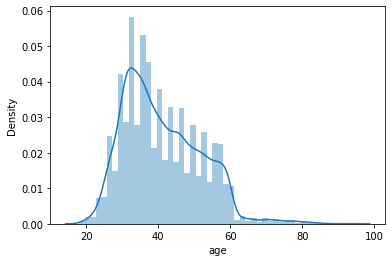

In [ ]:
sns.distplot(data['age']);

In [ ]:
data['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

> Majority of the people in the dataset are 32 years old.

In [ ]:
# Mean and Median
print("Mean: {}".format(data['age'].mean()))
print("Median: {}".format(data['age'].median()))

Mean: 40.93621021432837
Median: 39.0


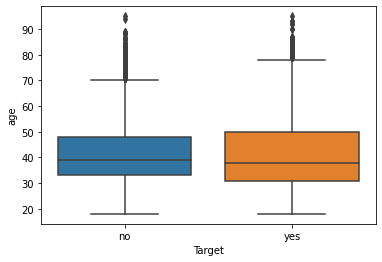

In [ ]:
# How is 'age' related to 'Target'?
sns.boxplot(data['Target'], data['age']);

> Mostly customers in the dataset are between 30 to 50 years old.

#### 2. 'balance' : balance in account

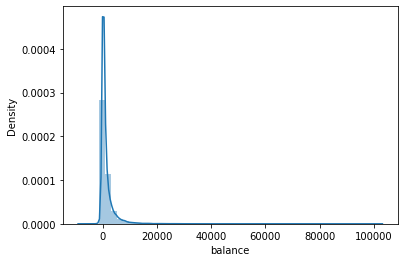

In [ ]:
sns.distplot(data['balance']);

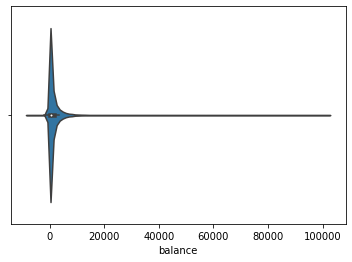

In [ ]:
sns.violinplot(data['balance']);

> Data for 'balance' is right-skewed.

In [ ]:
data['balance'].skew()

8.360308326166326

In [ ]:
data['balance'].value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

> Mostly balance of customers is 0.

In [ ]:
# Mean and Median
print("Mean: {}".format(data['balance'].mean()))
print("Median: {}".format(data['balance'].median()))

Mean: 1362.2720576850766
Median: 448.0


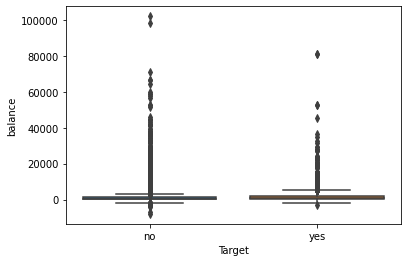

In [ ]:
# How is 'balance' related to 'Target'?
sns.boxplot(data['Target'], data['balance']);

> There are many outliers. 

#### 3. 'day' : last contact day of the month

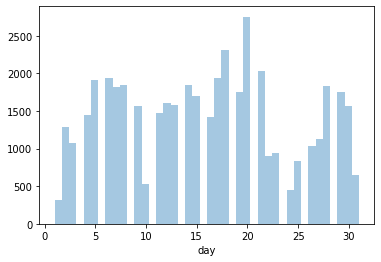

In [ ]:
sns.distplot(data['day'], kde = False);

In [ ]:
data['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

> mostly customers were contacted around 20th day of the month.

In [ ]:
# Mean and Median
print("Mean: {}".format(data['day'].mean()))
print("Median: {}".format(data['day'].median()))

Mean: 15.80641879188693
Median: 16.0


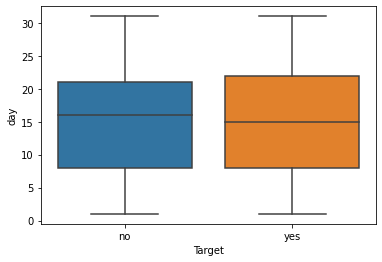

In [ ]:
# How is 'day' related to 'Target'?
sns.boxplot(data['Target'], data['day']);

#### 4. 'duration' :  last contact duration, in seconds*

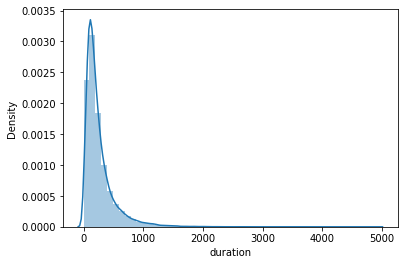

In [ ]:
sns.distplot(data['duration']);

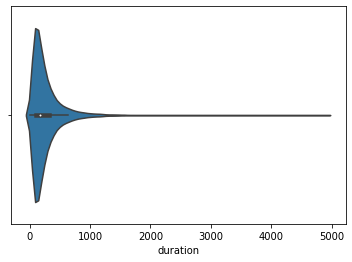

In [ ]:
sns.violinplot(data['duration']);

> 'duration' is right-skewed data.

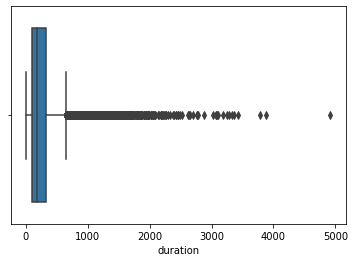

In [ ]:
# There are many outliers
sns.boxplot(data['duration']);

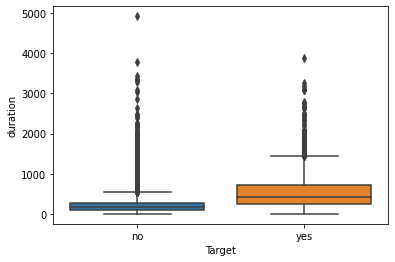

In [ ]:
# How is it related to 'Target'?
sns.boxplot(data['Target'], data['duration']);

> The call duration was almost around 425 seconds for the customers who ended up saying yes for the Term Deposit subcription.

#### 5. 'campaign' : number of contacts performed during this campaign and for this client

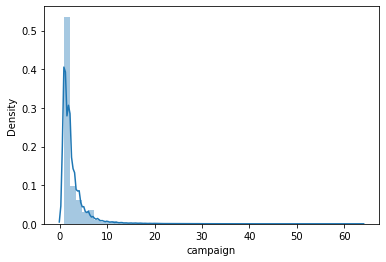

In [ ]:
sns.distplot(data['campaign']);

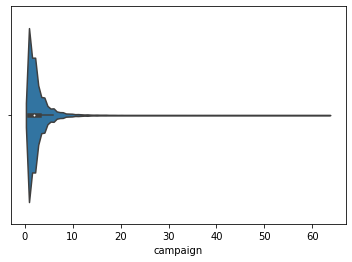

In [ ]:
sns.violinplot(data['campaign']);

> The data is right skewed.

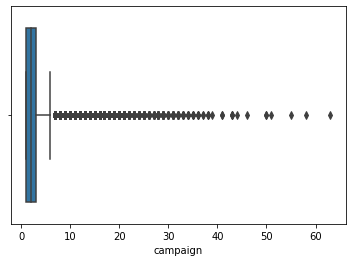

In [ ]:
# There are many outliers.
sns.boxplot(data['campaign']);

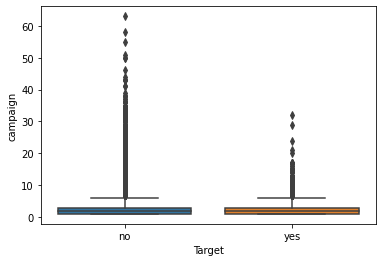

In [ ]:
# How is it related to 'Target'?
sns.boxplot(data['Target'], data['campaign']);

> It does not really affect the Target variable.

#### 6. 'pdays' : number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)

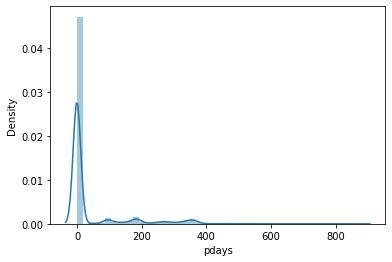

In [ ]:
sns.distplot(data['pdays']);

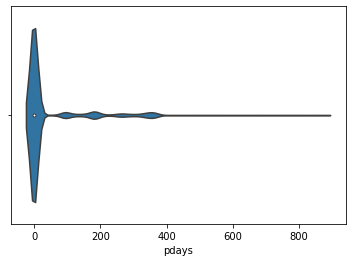

In [ ]:
sns.violinplot(data['pdays']);

> The data is right skewed.

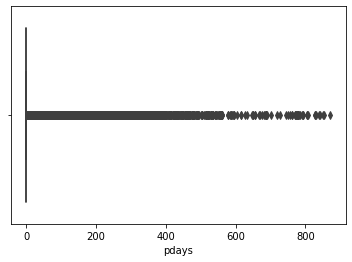

In [ ]:
# There are many outliers.
sns.boxplot(data['pdays']);

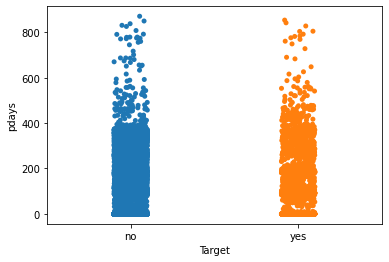

In [ ]:
# How is it related to 'Target'?
sns.stripplot(data['Target'], data['pdays']);

#### 7. 'previous' : number of times the client has been contacted before for the last campaign to subscribe term deposit

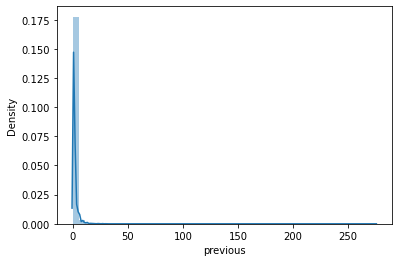

In [ ]:
sns.distplot(data['previous']);

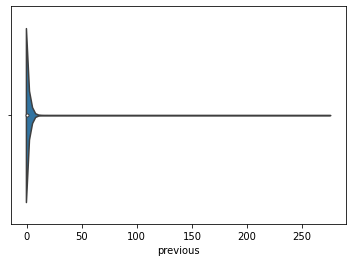

In [ ]:
sns.violinplot(data['previous']);

> Data is right-skewed.

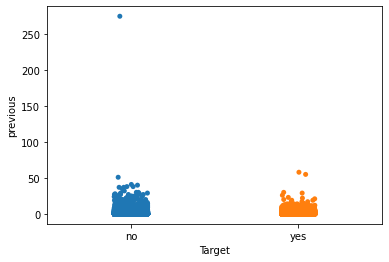

In [ ]:
# How is it related to 'Target'?
sns.stripplot(data['Target'], data['previous']);

### Univariate Analysis: Categorical Columns

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [ ]:
# Categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 
            'housing','loan', 'contact',  'month',  
            'poutcome', 'Target']

In [ ]:
# Check unique values
for i in cat_cols:
    print(data[i].describe())
    print(" ")

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object
 
count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object
 
count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object
 
count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object
 
count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object
 
count     45211
unique        2
top          no
freq      37967
Name: loan, dtype: object
 
count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object
 
count     45211
unique       12
top         may
freq      13766
Name: month, dtype: object
 
count       45211
unique          4
top       unknown
freq        36959
Name: poutcome, dtype: object
 
count     45211
unique        2
top          no
freq      39922
Name: Target, dtype

In [ ]:
# Check value counts
for i in cat_cols:
    print(data[i].value_counts())
    print(" ")

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
 
no     44396
yes      815
Name: default, dtype: int64
 
yes    25130
no     20081
Name: housing, dtype: int64
 
no     37967
yes     7244
Name: loan, dtype: int64
 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
 
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
 
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [ ]:
# check 'unknown' values
data[cat_cols].isin(['unknown']).any()

job           True
marital      False
education     True
default      False
housing      False
loan         False
contact       True
month        False
poutcome      True
Target       False
dtype: bool

#### 1. 'job' : Type of job 

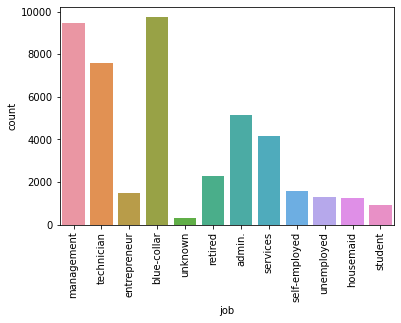

In [ ]:
sns.countplot(data['job']);
plt.xticks(rotation = 90);

In [ ]:
# Replace unknown values with most frequent value
data['job'].replace('unknown', 'blue-collar', inplace = True)

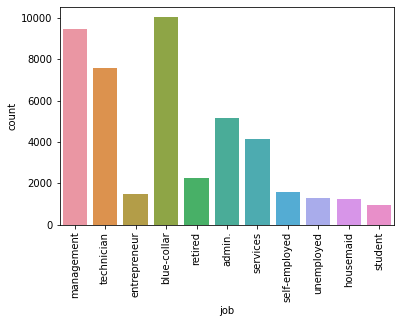

In [ ]:
sns.countplot(data['job']);
plt.xticks(rotation = 90);

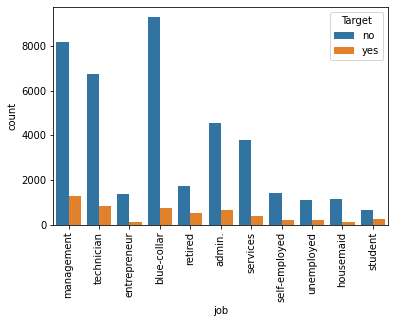

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['job'], hue = data['Target'] );
plt.xticks(rotation = 90);

> Most customers who subcribed Term Deposit had a management job.

#### 2. 'marital' : marital status (married, single, divorced)

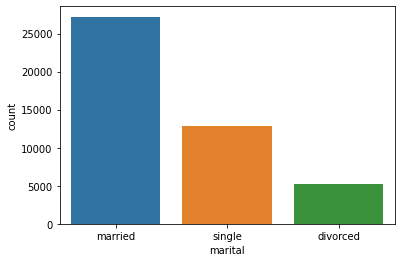

In [ ]:
sns.countplot(data['marital']);

In [ ]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

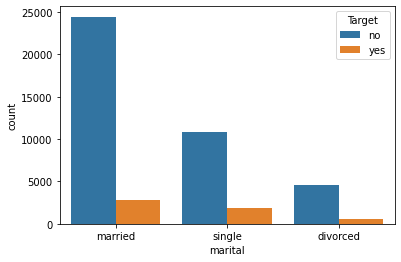

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['marital'], hue = data['Target'] );

> Most customers who subcribed Term Deposit were married.

#### 3. 'education' : education level (primary, secondary, tertiary)

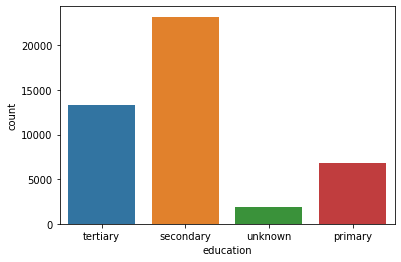

In [ ]:
sns.countplot(data['education']);

In [ ]:
# replace 'unknown' by most frequent value
data['education'].replace('unknown', 'secondary', inplace = True)

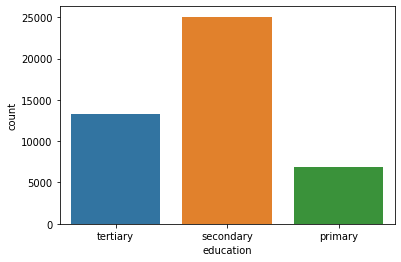

In [ ]:
sns.countplot(data['education']);

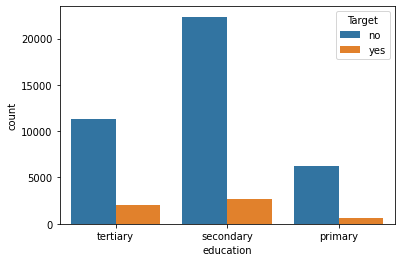

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['education'], hue = data['Target'] );

> Most customers who subcribed Term Deposit had secondary education.

#### 4. 'default' : has credit in default?

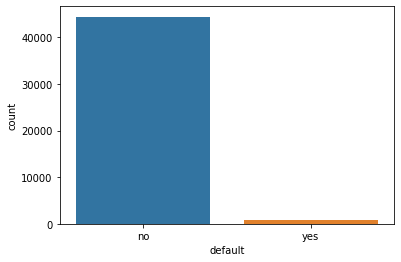

In [ ]:
sns.countplot(data['default']);

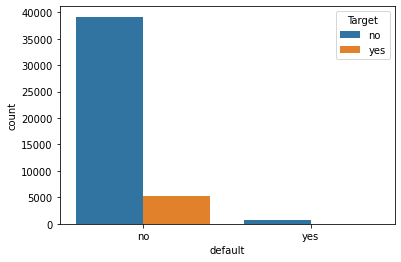

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['default'], hue = data['Target'] );

> Most customers who subcribed Term Deposit had no credit in default.

#### 5. 'housing' :  has housing loan?

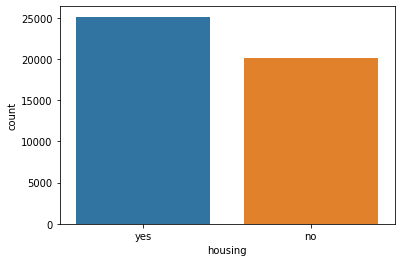

In [ ]:
sns.countplot(data['housing']);

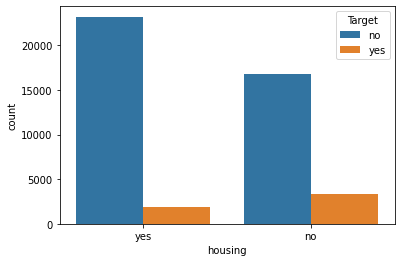

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['housing'], hue = data['Target'] );

> Most customers who subcribed Term Deposit had no housing loan.

#### 6. 'loan' : has personal loan?

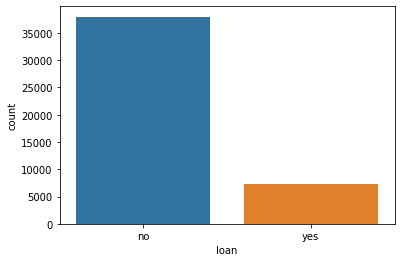

In [ ]:
sns.countplot(data['loan']);

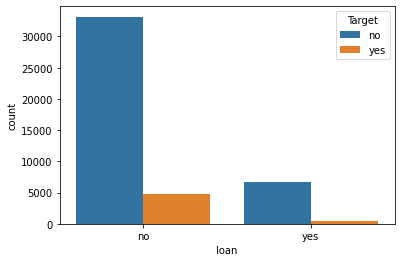

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['loan'], hue = data['Target'] );

> Most customers who subcribed Term Deposit had no personal loan.

#### 7. 'contact' : contact communication type

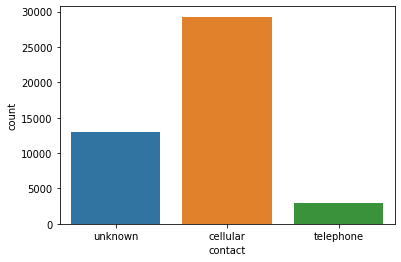

In [ ]:
sns.countplot(data['contact']);

In [ ]:
# remove 'unknown' category
data.groupby('contact')['Target'].value_counts()

contact    Target
cellular   no        24916
           yes        4369
telephone  no         2516
           yes         390
unknown    no        12490
           yes         530
Name: Target, dtype: int64

In [ ]:
data['contact'].replace('unknown', 'cellular', inplace = True)

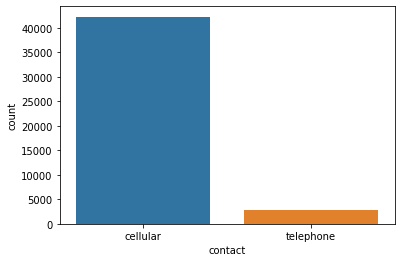

In [ ]:
sns.countplot(data['contact']);

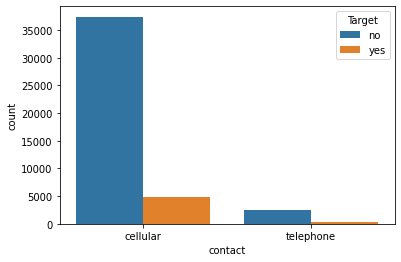

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['contact'], hue = data['Target'] );

> Most customers who subcribed Term Deposit had cellular contact communication type.

#### 8. 'month' : last contact month of year

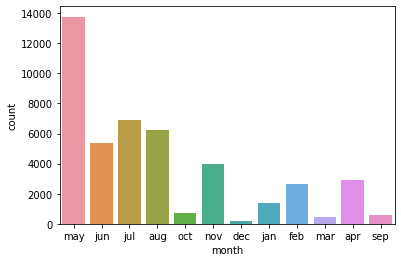

In [ ]:
sns.countplot(data['month']);

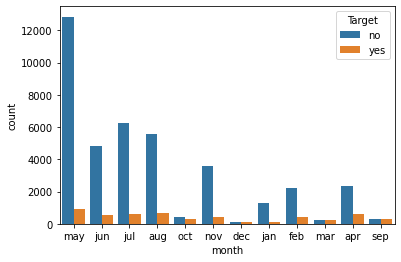

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['month'], hue = data['Target'] );

> Most customers who subcribed Term Deposit were last contacted in the month of May.

#### 9. 'poutcome' : outcome of the previous marketing campaign

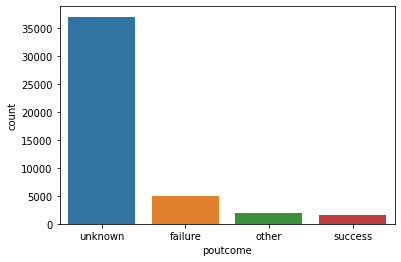

In [ ]:
sns.countplot(data['poutcome']);

In [ ]:
# remove 'unknown' category
data.groupby('poutcome')['Target'].value_counts()

poutcome  Target
failure   no         4283
          yes         618
other     no         1533
          yes         307
success   yes         978
          no          533
unknown   no        33573
          yes        3386
Name: Target, dtype: int64

In [ ]:
data['poutcome'].replace('unknown', 'failure', inplace = True)

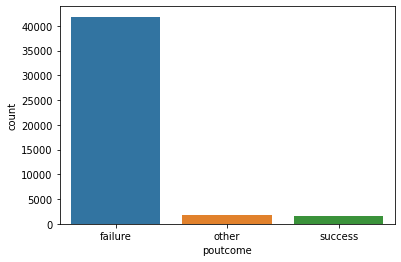

In [ ]:
sns.countplot(data['poutcome']);

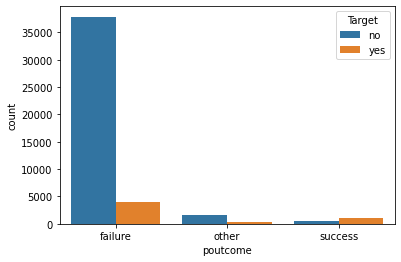

In [ ]:
# How is it related to 'Target'?
sns.countplot(data['poutcome'], hue = data['Target'] );

> The outcome of previous marketing campiagn was a failure for most people who subcribed Term Deposit.

### Target Variable 

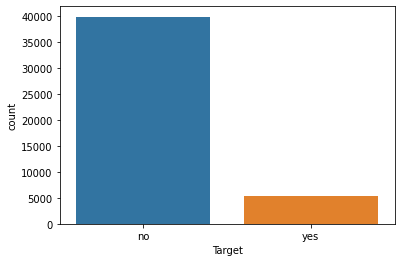

In [ ]:
sns.countplot(data['Target']);

> There is class imbalance. More customers who said 'no' as compared to 'yes'.

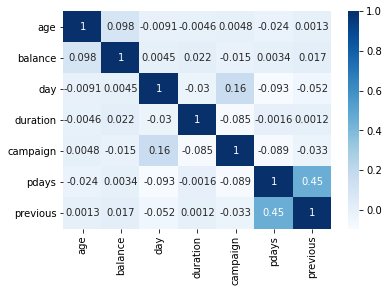

In [ ]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues');

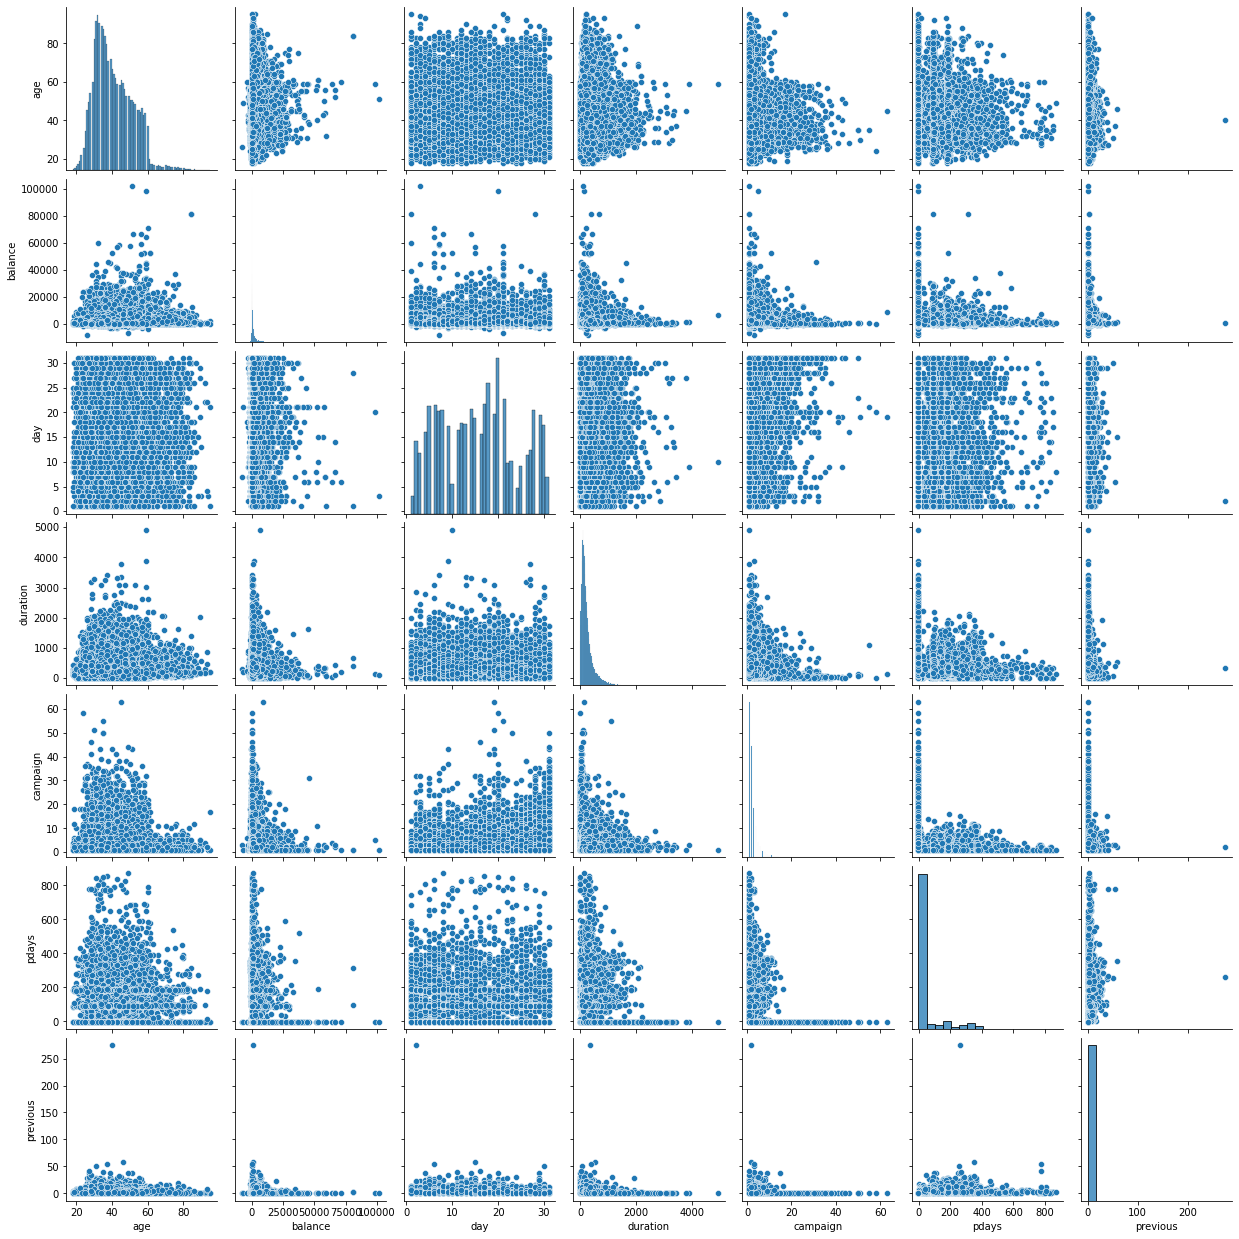

In [ ]:
sns.pairplot(data);

# 3. Train Model

## 3a. Prepare data for training

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [ ]:
# convert categorical columns to 'category' dtypes
for i in cat_cols:
    data[i] = data[i].astype('category')

In [ ]:
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [ ]:
# Create dummy variables
dummy_cols = ['job','marital','education','default',
             'housing', 'loan','contact','month','poutcome']
data = pd.get_dummies(data, columns = dummy_cols, drop_first = True)

In [ ]:
# Label encode 'Target' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Target'] = le.fit_transform(data['Target'])

In [ ]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,Target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,33,2,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,47,1506,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,33,1,5,198,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.shape

(45211, 39)

In [ ]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'Target', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [ ]:
# Get the model ready
x = data.drop('Target', axis = 1)
y = data['Target']

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

## 3a. Model 1: Logistic Regression 

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

GS_lr = GridSearchCV(estimator = LogisticRegression(),
             param_grid = {'solver' : ['newton-cg','lbfgs','liblinear','sag','saga'],
                           'penalty' : ['l1', 'l2'],
                           'class_weight' : ['None', 'balanced'],
                           'C' : [0.1,0.5,1]})

GS_lr.fit(x_train, y_train)

print(GS_lr.best_params_)

{'C': 0.5, 'class_weight': 'None', 'penalty': 'l2', 'solver': 'newton-cg'}


[[11641   328]
 [ 1053   542]]


,Score,Results
0,Training score,0.902424
1,Testing score,0.898186
2,Accuracy score,0.898186
3,Recall score,0.339812
4,Precision score,0.622989
5,F1 score,0.439757
6,ROC AUC score,0.656204


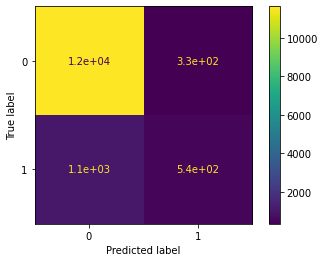

In [ ]:
# Create Model
classifier_lr = LogisticRegression(random_state = 0,
                                  solver = 'newton-cg',
                                  penalty = 'l2',
                                  C = 0.5)
classifier_lr.fit(x_train, y_train)

# predict test set results
y_pred_lr = classifier_lr.predict(x_test)

# evaluate model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
plot_confusion_matrix(classifier_lr, x_test, y_test)

# Evaluation Scores
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [classifier_lr.score(x_train, y_train),
          classifier_lr.score(x_test, y_test),
          accuracy_score(y_test, y_pred_lr),
          recall_score(y_test, y_pred_lr),
          precision_score(y_test, y_pred_lr),
          f1_score(y_test, y_pred_lr),
          roc_auc_score(y_test, y_pred_lr)]
df_log_reg = pd.DataFrame({'Score': score,
                           'Results': results})
df_log_reg

## 3b. Model 2: Decision Tree

[[11078   891]
 [  864   731]]


,Score,Results
0,Training score,1.000000
1,Testing score,0.870613
2,Accuracy score,0.870613
3,Recall score,0.458307
4,Precision score,0.450678
5,F1 score,0.454461
6,ROC AUC score,0.691932


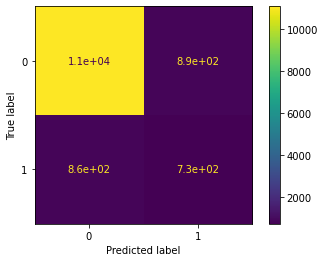

In [ ]:
# Create Model
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'entropy', 
                               random_state = 0)
dTree.fit(x_train, y_train)

# predict test set results
y_pred_dTree = dTree.predict(x_test)

# evaluate model
cm_dTree = confusion_matrix(y_test, y_pred_dTree)
print(cm_dTree)
plot_confusion_matrix(dTree, x_test, y_test)

# Evaluation Scores
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [dTree.score(x_train, y_train),
          dTree.score(x_test, y_test),
          accuracy_score(y_test, y_pred_dTree),
          recall_score(y_test, y_pred_dTree),
          precision_score(y_test, y_pred_dTree),
          f1_score(y_test, y_pred_dTree),
          roc_auc_score(y_test, y_pred_dTree)]
df_dTree = pd.DataFrame({'Score': score,
                        'Results': results})
df_dTree

> Training score is 1.00 whereas testing score is 0.87, hence there is overfitting so we prune the decision tree.

### Pruning the decision tree

[[11656   313]
 [ 1087   508]]


,Score,Results
0,Training score,0.901697
1,Testing score,0.896786
2,Accuracy score,0.896786
3,Recall score,0.318495
4,Precision score,0.618758
5,F1 score,0.420530
6,ROC AUC score,0.646172


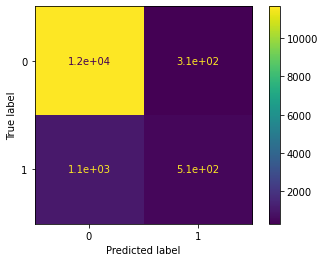

In [ ]:
# Create Model
from sklearn.tree import DecisionTreeClassifier
dTree_p = DecisionTreeClassifier(criterion = 'entropy',
                               max_depth = 3,
                              random_state = 0)
dTree_p.fit(x_train, y_train)

# predict test set results
y_pred_dTree_p = dTree_p.predict(x_test)

# evaluate model
cm_dTree_p = confusion_matrix(y_test, y_pred_dTree_p)
print(cm_dTree_p)
plot_confusion_matrix(dTree_p, x_test, y_test)

# Evaluation Scores
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [dTree_p.score(x_train, y_train),
          dTree_p.score(x_test, y_test),
          accuracy_score(y_test, y_pred_dTree_p),
          recall_score(y_test, y_pred_dTree_p),
          precision_score(y_test, y_pred_dTree_p),
          f1_score(y_test, y_pred_dTree_p),
          roc_auc_score(y_test, y_pred_dTree_p)]
df_dTree_p = pd.DataFrame({'Score': score,
                           'Results': results})
df_dTree_p

> Training and Testing score are almost similar, hence there is no overfitting here.

## 3c. Ensemble Techniques

### 1. Random Forest Classifier

[[11630   339]
 [  971   624]]


,Score,Results
0,Training score,0.999968
1,Testing score,0.903421
2,Accuracy score,0.903421
3,Recall score,0.391223
4,Precision score,0.647975
5,F1 score,0.487881
6,ROC AUC score,0.681450


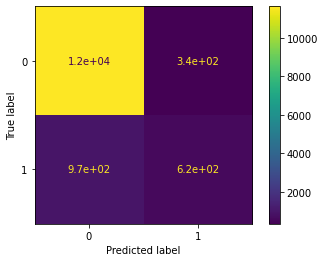

In [ ]:
# Create model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,
                            random_state = 0)
rfc.fit(x_train, y_train)

# predict test set results
y_pred_rfc = rfc.predict(x_test)

# evaluate model
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)
plot_confusion_matrix(rfc, x_test, y_test)

# evaluation metrics
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [rfc.score(x_train, y_train),
          rfc.score(x_test, y_test),
          accuracy_score(y_test, y_pred_rfc),
          recall_score(y_test, y_pred_rfc),
          precision_score(y_test, y_pred_rfc),
          f1_score(y_test, y_pred_rfc),
          roc_auc_score(y_test, y_pred_rfc)]
df_rfc = pd.DataFrame({'Score': score,
                        'Results': results})
df_rfc

[[11876    93]
 [ 1329   266]]


,Score,Results
0,Training score,0.902582
1,Testing score,0.895164
2,Accuracy score,0.895164
3,Recall score,0.166771
4,Precision score,0.740947
5,F1 score,0.272262
6,ROC AUC score,0.579501


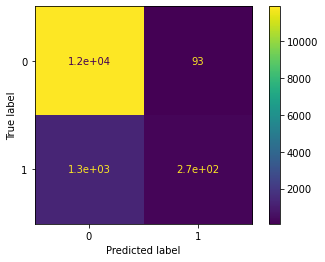

In [ ]:
# Create model
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators = 500,
                             criterion = 'gini',
                             max_depth = 8,
                            random_state = 0)
rfc2.fit(x_train, y_train)

# predict test set results
y_pred_rfc2 = rfc2.predict(x_test)

# evaluate model
cm_rfc2 = confusion_matrix(y_test, y_pred_rfc2)
print(cm_rfc2)
plot_confusion_matrix(rfc2, x_test, y_test)

# evaluation metrics
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [rfc2.score(x_train, y_train),
          rfc2.score(x_test, y_test),
          accuracy_score(y_test, y_pred_rfc2),
          recall_score(y_test, y_pred_rfc2),
          precision_score(y_test, y_pred_rfc2),
          f1_score(y_test, y_pred_rfc2),
          roc_auc_score(y_test, y_pred_rfc2)]
df_rfc2 = pd.DataFrame({'Score': score,
                        'Results': results})
df_rfc2

#### Grid Search:

In [ ]:
from sklearn.model_selection import GridSearchCV

GS_rfc = GridSearchCV(estimator = RandomForestClassifier(),
             param_grid = {'n_estimators': [50,100],
                           'criterion': ['gini', 'entropy'],
                           'max_depth': [3,4,5],
                           'max_features': [6,7,8],
                           'min_samples_split': [2,3]})

GS_rfc.fit(x_train, y_train)

print(GS_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100}


[[11890    79]
 [ 1346   249]]


,Score,Results
0,Training score,0.897684
1,Testing score,0.894942
2,Accuracy score,0.894942
3,Recall score,0.156113
4,Precision score,0.759146
5,F1 score,0.258970
6,ROC AUC score,0.574756


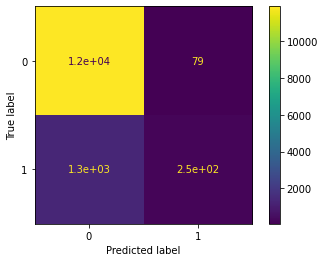

In [ ]:
# Create new model
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(criterion = 'entropy',
                             n_estimators = 100,
                             max_depth = 5,
                             max_features = 8,
                             min_samples_split = 2,
                            random_state = 0)
rfc1.fit(x_train, y_train)

# predict test set results
y_pred_rfc1 = rfc1.predict(x_test)

# evaluate model
cm_rfc1 = confusion_matrix(y_test, y_pred_rfc1)
print(cm_rfc1)
plot_confusion_matrix(rfc1, x_test, y_test)

# evaluation metrics
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [rfc1.score(x_train, y_train),
          rfc1.score(x_test, y_test),
          accuracy_score(y_test, y_pred_rfc1),
          recall_score(y_test, y_pred_rfc1),
          precision_score(y_test, y_pred_rfc1),
          f1_score(y_test, y_pred_rfc1),
          roc_auc_score(y_test, y_pred_rfc1)]
df_rfc1 = pd.DataFrame({'Score': score,
                        'Results': results})
df_rfc1

> This gets rid of overfitting. 

### 2. AdaBoost Classifier

[[11354   615]
 [  851   744]]


,Score,Results
0,Training score,0.976143
1,Testing score,0.891920
2,Accuracy score,0.891920
3,Recall score,0.466458
4,Precision score,0.547461
5,F1 score,0.503724
6,ROC AUC score,0.707537


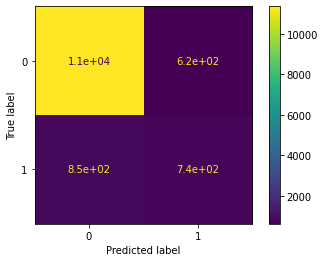

In [ ]:
# Create model
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators = 500,
                         base_estimator = dTree_p,
                          random_state = 0)
abc.fit(x_train, y_train)

# predict test set results
y_pred_abc = abc.predict(x_test)

# evaluate model
cm_abc = confusion_matrix(y_test, y_pred_abc)
print(cm_abc)
plot_confusion_matrix(abc, x_test, y_test)

# evaluation metrics
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [abc.score(x_train, y_train),
          abc.score(x_test, y_test),
          accuracy_score(y_test, y_pred_abc),
          recall_score(y_test, y_pred_abc),
          precision_score(y_test, y_pred_abc),
          f1_score(y_test, y_pred_abc),
          roc_auc_score(y_test, y_pred_abc)]
df_abc = pd.DataFrame({'Score': score,
                        'Results': results})
df_abc

### 3. Bagging Classifier

[[11646   323]
 [ 1067   528]]


,Score,Results
0,Training score,0.903245
1,Testing score,0.897523
2,Accuracy score,0.897523
3,Recall score,0.331034
4,Precision score,0.620447
5,F1 score,0.431725
6,ROC AUC score,0.652024


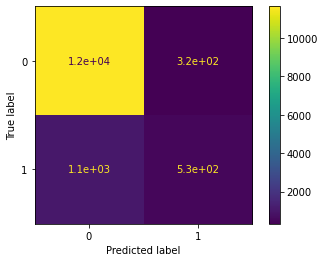

In [ ]:
# Create model
from sklearn.ensemble import BaggingClassifier
bc  = BaggingClassifier(n_estimators = 500,
                        base_estimator = dTree_p,
                        random_state = 0)
bc.fit(x_train, y_train)

# predict test set results
y_pred_bc = bc.predict(x_test)

# evaluate model
cm_bc = confusion_matrix(y_test, y_pred_bc)
print(cm_bc)
plot_confusion_matrix(bc, x_test, y_test)

# evaluation metrics
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [bc.score(x_train, y_train),
          bc.score(x_test, y_test),
          accuracy_score(y_test, y_pred_bc),
          recall_score(y_test, y_pred_bc),
          precision_score(y_test, y_pred_bc),
          f1_score(y_test, y_pred_bc),
          roc_auc_score(y_test, y_pred_bc)]
df_bc = pd.DataFrame({'Score': score,
                      'Results': results})
df_bc

### 4. Gradient Boost Classifier

[[11558   411]
 [  890   705]]


,Score,Results
0,Training score,0.926312
1,Testing score,0.904084
2,Accuracy score,0.904084
3,Recall score,0.442006
4,Precision score,0.631720
5,F1 score,0.520103
6,ROC AUC score,0.703834


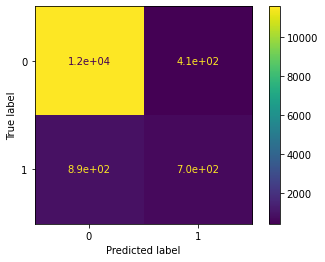

In [ ]:
# Create model
from sklearn.ensemble import GradientBoostingClassifier
gbc  = GradientBoostingClassifier(n_estimators = 500,
                                random_state = 0)
gbc.fit(x_train, y_train)

# predict test set results
y_pred_gbc = gbc.predict(x_test)

# evaluate model
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
print(cm_gbc)
plot_confusion_matrix(gbc, x_test, y_test)

# evaluation metrics
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [gbc.score(x_train, y_train),
          gbc.score(x_test, y_test),
          accuracy_score(y_test, y_pred_gbc),
          recall_score(y_test, y_pred_gbc),
          precision_score(y_test, y_pred_gbc),
          f1_score(y_test, y_pred_gbc),
          roc_auc_score(y_test, y_pred_gbc)]
df_gbc = pd.DataFrame({'Score': score,
                        'Results': results})
df_gbc

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV

GS_gbc = GridSearchCV(estimator = GradientBoostingClassifier(),
             param_grid = {'n_estimators': [50,100],
                           #'loss': ['deviance', 'exponential'],
                           #'criterion': ['friedman_mse','mse', 'mae'],
                           'max_depth': [3,4,5],
                           'max_features': [6,7,8],
                           'min_samples_split': [2,3]})

GS_gbc.fit(x_train, y_train)

print(GS_gbc.best_params_)

{'max_depth': 5, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 100}


[[11567   402]
 [  915   680]]


,Score,Results
0,Training score,0.924385
1,Testing score,0.902905
2,Accuracy score,0.902905
3,Recall score,0.426332
4,Precision score,0.631720
5,F1 score,0.508031
6,ROC AUC score,0.696373


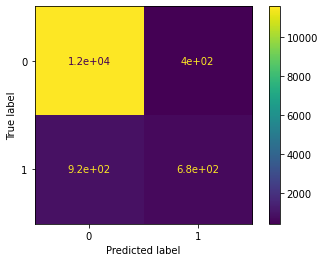

In [ ]:
# Create model
from sklearn.ensemble import GradientBoostingClassifier
gbc1  = GradientBoostingClassifier(n_estimators = 100,
                                  max_depth = 5,
                                  max_features = 8,
                                  min_samples_split =2,
                                random_state = 0)
gbc1.fit(x_train, y_train)

# predict test set results
y_pred_gbc1 = gbc1.predict(x_test)

# evaluate model
cm_gbc1 = confusion_matrix(y_test, y_pred_gbc1)
print(cm_gbc1)
plot_confusion_matrix(gbc1, x_test, y_test)

# evaluation metrics
score = ['Training score', 'Testing score', 'Accuracy score',
        'Recall score', 'Precision score', 'F1 score', 'ROC AUC score']
results = [gbc1.score(x_train, y_train),
          gbc1.score(x_test, y_test),
          accuracy_score(y_test, y_pred_gbc1),
          recall_score(y_test, y_pred_gbc1),
          precision_score(y_test, y_pred_gbc),
          f1_score(y_test, y_pred_gbc1),
          roc_auc_score(y_test, y_pred_gbc1)]
df_gbc1 = pd.DataFrame({'Score': score,
                        'Results': results})
df_gbc1

In [106]:
gbc1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': 8,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [107]:
# Feature Importance
col1 = x.columns
col2 = gbc1.feature_importances_
df_fi = pd.DataFrame({'feature': col1,
                      'Importance': col2})
df_fi.sort_values(by = 'Importance', ascending= False)
df_fi

,feature,Importance
0,age,0.050257
1,balance,0.025273
2,day,0.036849
3,duration,0.453315
4,campaign,0.013321
5,pdays,0.036386
6,previous,0.031482
7,job_blue-collar,0.003291
8,job_entrepreneur,0.001887
9,job_housemaid,0.001645


# Conclusion:

Confusion Matrix means:

<blockquote>*True Positive (observed=1,predicted=1):*

Predicted that customer subcribes Term Deposit and the customer actually subcribes it. 

*False Positive (observed=0,predicted=1):*

Predicted that customer subcribes Term Deposit and the customer actually does not subcribe it.

*True Negative (observed=0,predicted=0):*

Predicted that customer does not subcribe Term Deposit and the customer actually does not subcribe it.

*False Negative (observed=1,predicted=0):*

Predicted that customer does not subcribe Term Deposit and the customer actually subcribes it.  </blockquote>

The Goal here is to Use the data collected from existing customers and build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit(TP) and thus increase their hit ratio.

Hit Ratio is the number of times that a correct prediciton was made in ratio to the number of total predicitons. 

- Accuracy simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions

- Precision answers the question: Out of the items that the classifier predicted to be true, how many are actually true? Whereas, recall answers the question: Out of all the items that are true, how many are found to be true by the classifier?

Here, False negative should be less i.e. there should be minimum cases when the model predicts that the customer will not subcribes Term Deposit but he/she actually subcribes. The Bank might loose a liable customer in this case. Hence, Recall is the important metric. 
Keeping in mind the high hit ratio, we need high accuracy score as well.

In [ ]:
# Final dataframe with accuracy scores
df1 = df_log_reg.merge(df_dTree_p, on = 'Score')
df1.rename(columns = {'Results_x':'Logistic regression', 'Results_y':'Decision Tree'}, inplace = True)
df2 = df1.merge(df_rfc,on = 'Score' )
df2.rename(columns = {'Results':'Random Forest'}, inplace = True)
df3 = df2.merge(df_abc, on = 'Score')
df3.rename(columns = {'Results':'AdaBoost'}, inplace = True)
df4 = df3.merge(df_bc, on = 'Score' )
df4.rename(columns = {'Results':'Bagging'}, inplace = True)
df5 = df4.merge(df_gbc1, on = 'Score' )
df5.rename(columns = {'Results':'GradientBoost'}, inplace = True)
df5.set_index('Score')

df5

,Score,Logistic regression,Decision Tree,Random Forest,AdaBoost,Bagging,GradientBoost
0,Training score,0.902424,0.901697,0.999968,0.976143,0.903245,0.924385
1,Testing score,0.898186,0.896786,0.903421,0.891920,0.897523,0.902905
2,Accuracy score,0.898186,0.896786,0.903421,0.891920,0.897523,0.902905
3,Recall score,0.339812,0.318495,0.391223,0.466458,0.331034,0.426332
4,Precision score,0.622989,0.618758,0.647975,0.547461,0.620447,0.631720
5,F1 score,0.439757,0.420530,0.487881,0.503724,0.431725,0.508031
6,ROC AUC score,0.656204,0.646172,0.681450,0.707537,0.652024,0.696373


**In conclusion, we select the 'GradientBoost' classifier with highest accuracy score. Even though Recall is highest for 'AdaBoost', but there is overfitting in that classifier, so reject it. Considering the F1 score, that accounts for both recall and precision, 'Gradient Boost' is the best option.**